🎯 Goal: Predict total_fatalities using features like smoking_rate, prescriptions, etc.

Load Merged Dataset

In [16]:
import pandas as pd

df = pd.read_csv(r"D:\Unified Mentor Intership\Data Science projects\Tobacco Use and Mortality, 2004-2015\Merged_features\merged_features.csv")


Fill missing values (with mean/median)

In [17]:
# Fill missing with column mean
df_filled = df.fillna(df.mean(numeric_only=True))

# Split again
X = df_filled.drop(columns=["Year", "total_fatalities"])
y = df_filled["total_fatalities"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Models
🔸 A. Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))


Linear Regression R²: 0.49822090485568526
RMSE: 27612.016026319332


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


B. Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


Random Forest R²: 0.836201243570428
RMSE: 15776.00862033396


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


 Feature Importance (Optional)

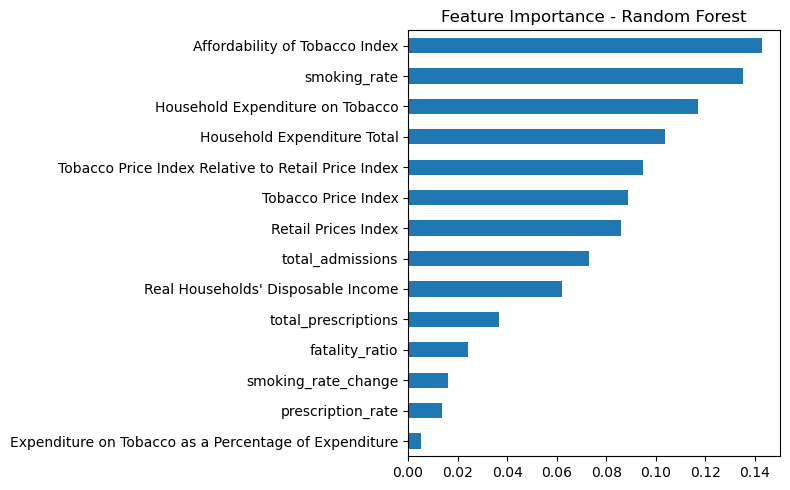

In [20]:
import matplotlib.pyplot as plt

feat_importance = pd.Series(rf.feature_importances_, index=features.columns)
feat_importance.sort_values().plot(kind="barh", figsize=(8, 5), title="Feature Importance - Random Forest")
plt.tight_layout()
plt.show()
